### Business Case: The Marketing manager wants to understand the data better. She wishes to explore if this data shows some trends about what type of people buy personal loans.

In [5]:
.libPaths("/home/rstudio/R/x86_64-pc-linux-gnu-library/3.4")

In [36]:
library(VIM)
library(caret)
library(pROC)

In [7]:
bank.data <- read.csv("bank-data.csv", header = TRUE, stringsAsFactors = FALSE)

In [8]:
head(bank.data)

id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pl
ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO
ID12106,57,FEMALE,TOWN,37869.6,YES,2,NO,YES,YES,NO,YES


In [9]:
tail(bank.data)

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pl
595,ID12695,59,FEMALE,RURAL,30971.80,YES,3,YES,YES,YES,YES,NO
596,ID12696,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
597,ID12697,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
598,ID12698,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
599,ID12699,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO
600,ID12700,38,MALE,TOWN,26671.60,NO,0,YES,NO,YES,YES,YES


In [10]:
str(bank.data)

'data.frame':	600 obs. of  12 variables:
 $ id         : chr  "ID12101" "ID12102" "ID12103" "ID12104" ...
 $ age        : int  48 40 51 23 57 57 22 58 37 54 ...
 $ sex        : chr  "FEMALE" "MALE" "FEMALE" "FEMALE" ...
 $ region     : chr  "INNER_CITY" "TOWN" "INNER_CITY" "TOWN" ...
 $ income     : num  17546 30085 16575 20375 50576 ...
 $ married    : chr  "NO" "YES" "YES" "YES" ...
 $ children   : int  1 3 0 3 0 2 0 0 2 2 ...
 $ car        : chr  "NO" "YES" "YES" "NO" ...
 $ save_act   : chr  "NO" "NO" "YES" "NO" ...
 $ current_act: chr  "NO" "YES" "YES" "YES" ...
 $ mortgage   : chr  "NO" "YES" "NO" "NO" ...
 $ pl         : chr  "YES" "NO" "NO" "NO" ...


In [11]:
sapply(bank.data, class)

id         age         sex      region      income     married 
"character"   "integer" "character" "character"   "numeric" "character" 
   children         car    save_act current_act    mortgage          pl 
  "integer" "character" "character" "character" "character" "character"

In [12]:
summary(bank.data)

      id                 age            sex               region         
 Length:600         Min.   :18.00   Length:600         Length:600        
 Class :character   1st Qu.:30.00   Class :character   Class :character  
 Mode  :character   Median :42.00   Mode  :character   Mode  :character  
                    Mean   :42.40                                        
                    3rd Qu.:55.25                                        
                    Max.   :67.00                                        
     income        married             children         car           
 Min.   : 5014   Length:600         Min.   :0.000   Length:600        
 1st Qu.:17264   Class :character   1st Qu.:0.000   Class :character  
 Median :24925   Mode  :character   Median :1.000   Mode  :character  
 Mean   :27524                      Mean   :1.012                     
 3rd Qu.:36173                      3rd Qu.:2.000                     
 Max.   :63130                      Max.   :3.000       

In [13]:
nrow(bank.data[!complete.cases(bank.data),])

[1] 0

In [14]:
bank.data[!complete.cases(bank.data),]

id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pl


### Missing data


 Variables sorted by number of missings: 
    Variable Count
          id     0
         age     0
         sex     0
      region     0
      income     0
     married     0
    children     0
         car     0
    save_act     0
 current_act     0
    mortgage     0
          pl     0


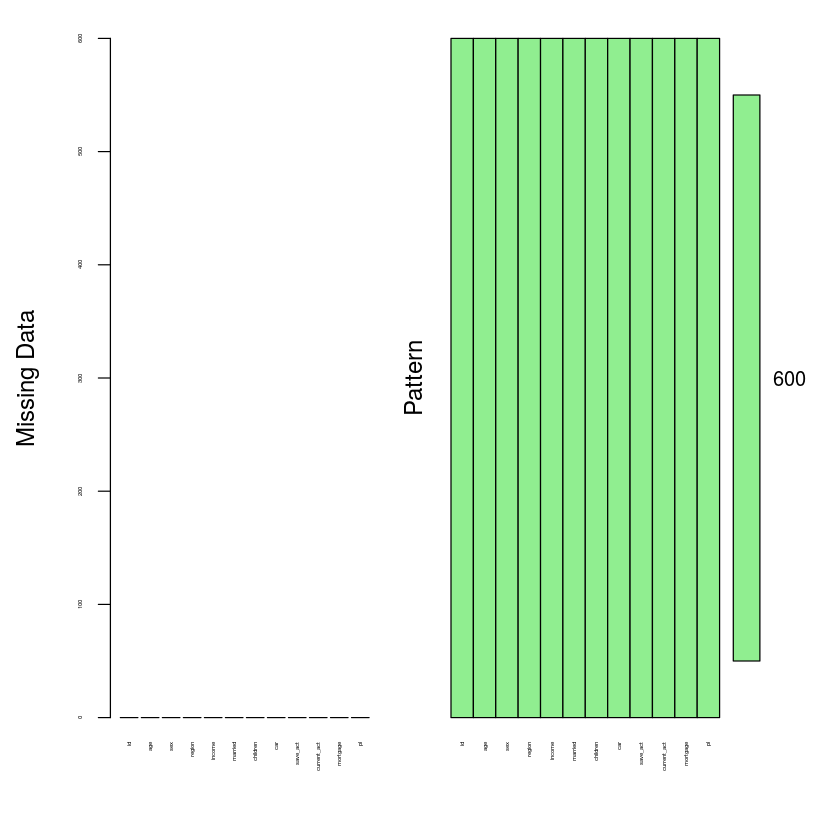

In [15]:
miss <- aggr(bank.data, prop = FALSE, col = c('light green', 'salmon'),
    numbers = TRUE, sortVars = TRUE,
    labels=names(bank.data), cex.axis = .3,
    gap = 3, ylab = c("Missing Data", "Pattern")
)

### outlier

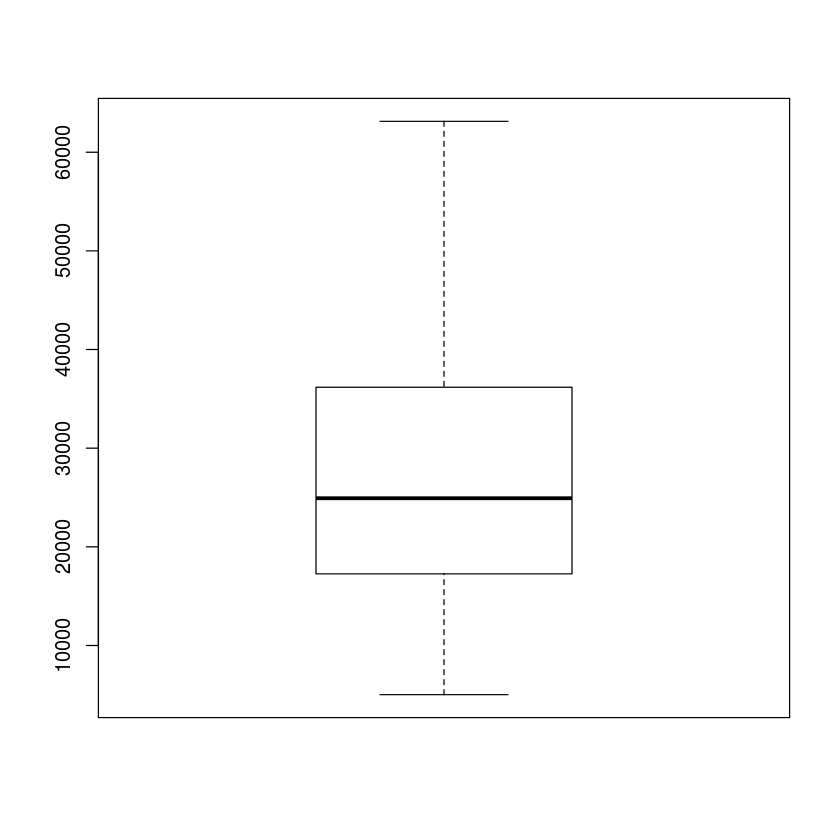

In [16]:
boxplot((bank.data$income))

In [17]:
summary(bank.data$income)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5014   17264   24925   27524   36173   63130 

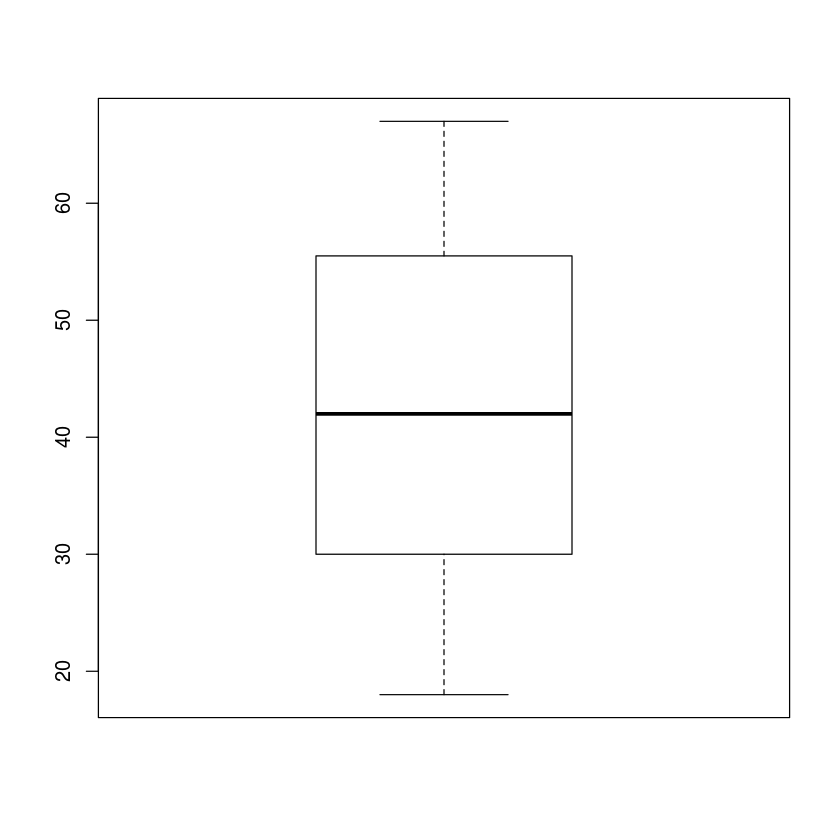

In [18]:
boxplot((bank.data$age))

In [19]:
summary(bank.data$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   30.00   42.00   42.40   55.25   67.00 

In [20]:
bank.data$id <- NULL
bank.data$age <- as.numeric(bank.data$age) 
bank.data$income <- as.numeric(bank.data$income)

In [21]:
check.dummy <- dummyVars(~.,bank.data["region"]) 
region.Dummy <- predict(check.dummy,bank.data["region"])
df.region.Dummy <- as.data.frame(region.Dummy) 
bank.data <- bank.data[setdiff(names(bank.data), c("region"))]
bank.data[bank.data == "NO"] <- 0
bank.data[bank.data == 'YES'] <- 1
bank.data[bank.data == "FEMALE"] <- 0
bank.data[bank.data == "MALE"] <- 1
bank.data <- cbind(bank.data, df.region.Dummy)
bank.data <- bank.data[, c(1:9,11:14,10)]
att <- setdiff(names(bank.data), c("age", "income")) 
for(c in att){ 
    bank.data[[c]] <- as.factor(bank.data[[c]]) 
}

In [22]:
str(bank.data)

'data.frame':	600 obs. of  14 variables:
 $ age             : num  48 40 51 23 57 57 22 58 37 54 ...
 $ sex             : Factor w/ 2 levels "0","1": 1 2 1 1 1 1 2 2 1 2 ...
 $ income          : num  17546 30085 16575 20375 50576 ...
 $ married         : Factor w/ 2 levels "0","1": 1 2 2 2 2 2 1 2 2 2 ...
 $ children        : Factor w/ 4 levels "0","1","2","3": 2 4 1 4 1 3 1 1 3 3 ...
 $ car             : Factor w/ 2 levels "0","1": 1 2 2 1 1 1 1 2 2 2 ...
 $ save_act        : Factor w/ 2 levels "0","1": 1 1 2 1 2 2 1 2 1 2 ...
 $ current_act     : Factor w/ 2 levels "0","1": 1 2 2 2 1 2 2 2 1 2 ...
 $ mortgage        : Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 1 1 ...
 $ regionINNER_CITY: Factor w/ 2 levels "0","1": 2 1 2 1 1 1 1 1 1 1 ...
 $ regionRURAL     : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 2 1 1 1 ...
 $ regionSUBURBAN  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 2 1 ...
 $ regionTOWN      : Factor w/ 2 levels "0","1": 1 2 1 2 1 2 1 2 1 2 ...
 $ pl              : Factor 

In [23]:
smp_size <- floor(0.75 * nrow(bank.data)) 
set.seed(123) 
index <- sample(seq_len(nrow(bank.data)), size = smp_size) 
bank.data.train <- bank.data[index, ] 
bank.data.test <- bank.data[-index,] 

In [24]:
dim(bank.data.train)

[1] 450  14

In [25]:
dim(bank.data.test)

[1] 150  14

In [26]:
mylogit <- glm(bank.data.train$pl ~., data = bank.data.train, family = "binomial")
summary(mylogit)


Call:
glm(formula = bank.data.train$pl ~ ., family = "binomial", data = bank.data.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5517  -0.8695  -0.3748   0.8877   2.2451  

Coefficients: (1 not defined because of singularities)
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -7.658e-01  5.381e-01  -1.423 0.154641    
age               -9.451e-04  1.217e-02  -0.078 0.938090    
sex1               3.935e-01  2.290e-01   1.718 0.085785 .  
income             5.208e-05  1.396e-05   3.731 0.000191 ***
married1          -9.420e-01  2.436e-01  -3.867 0.000110 ***
children1          2.351e+00  3.340e-01   7.039 1.93e-12 ***
children2          4.270e-02  2.721e-01   0.157 0.875293    
children3         -1.493e+00  4.535e-01  -3.292 0.000995 ***
car1              -3.842e-03  2.253e-01  -0.017 0.986397    
save_act1         -1.015e+00  2.626e-01  -3.866 0.000111 ***
current_act1      -2.445e-01  2.689e-01  -0.909 0.363119    
mortgage

In [27]:
anova(mylogit,test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,449,622.7565,NA
age,1,10.336896777,448,612.4196,1.303971e-03
sex,1,4.890717460,447,607.5289,2.700146e-02
income,1,5.905260851,446,601.6236,1.509573e-02
married,1,12.770339935,445,588.8533,3.521588e-04
children,3,85.049562485,442,503.8037,2.532314e-18
car,1,0.184425639,441,503.6193,6.675972e-01
save_act,1,14.689721038,440,488.9296,1.267356e-04
current_act,1,0.389215183,439,488.5403,5.327122e-01
mortgage,1,0.942163773,438,487.5982,3.317220e-01


In [28]:
backwards_mylogit=step(mylogit,direction = "backward")
summary(backwards_mylogit)

Start:  AIC=508.72
bank.data.train$pl ~ age + sex + income + married + children + 
    car + save_act + current_act + mortgage + regionINNER_CITY + 
    regionRURAL + regionSUBURBAN + regionTOWN


Step:  AIC=508.72
bank.data.train$pl ~ age + sex + income + married + children + 
    car + save_act + current_act + mortgage + regionINNER_CITY + 
    regionRURAL + regionSUBURBAN

                   Df Deviance    AIC
- car               1   478.72 506.72
- age               1   478.72 506.72
- regionRURAL       1   479.48 507.48
- regionINNER_CITY  1   479.51 507.51
- current_act       1   479.54 507.54
- mortgage          1   479.76 507.76
<none>                  478.72 508.72
- sex               1   481.69 509.69
- regionSUBURBAN    1   487.43 515.43
- income            1   493.46 521.46
- married           1   494.25 522.25
- save_act          1   494.33 522.33
- children          3   574.15 598.15

Step:  AIC=506.72
bank.data.train$pl ~ age + sex + income + married + children + 
    sa


Call:
glm(formula = bank.data.train$pl ~ sex + income + married + children + 
    save_act + regionSUBURBAN, family = "binomial", data = bank.data.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5835  -0.8898  -0.3720   0.8842   2.1545  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -8.759e-01  3.564e-01  -2.458 0.013989 *  
sex1             4.005e-01  2.237e-01   1.791 0.073366 .  
income           5.053e-05  9.442e-06   5.351 8.73e-08 ***
married1        -9.139e-01  2.402e-01  -3.804 0.000142 ***
children1        2.313e+00  3.295e-01   7.018 2.25e-12 ***
children2        6.425e-02  2.701e-01   0.238 0.811974    
children3       -1.435e+00  4.433e-01  -3.237 0.001208 ** 
save_act1       -1.009e+00  2.579e-01  -3.913 9.11e-05 ***
regionSUBURBAN1  9.934e-01  3.717e-01   2.672 0.007533 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)



In [29]:
anova(backwards_mylogit,test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,449,622.7565,NA
sex,1,3.203870,448,619.5526,7.346424e-02
income,1,17.736734,447,601.8159,2.536803e-05
married,1,12.438733,446,589.3771,4.205209e-04
children,3,85.460257,443,503.9169,2.067086e-18
save_act,1,14.909542,442,489.0073,1.127910e-04
regionSUBURBAN,1,7.355326,441,481.6520,6.686438e-03


In [30]:
forwards_mylogit=step(mylogit,direction = "forward")
summary(forwards_mylogit)

Start:  AIC=508.72
bank.data.train$pl ~ age + sex + income + married + children + 
    car + save_act + current_act + mortgage + regionINNER_CITY + 
    regionRURAL + regionSUBURBAN + regionTOWN




Call:
glm(formula = bank.data.train$pl ~ age + sex + income + married + 
    children + car + save_act + current_act + mortgage + regionINNER_CITY + 
    regionRURAL + regionSUBURBAN + regionTOWN, family = "binomial", 
    data = bank.data.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5517  -0.8695  -0.3748   0.8877   2.2451  

Coefficients: (1 not defined because of singularities)
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -7.658e-01  5.381e-01  -1.423 0.154641    
age               -9.451e-04  1.217e-02  -0.078 0.938090    
sex1               3.935e-01  2.290e-01   1.718 0.085785 .  
income             5.208e-05  1.396e-05   3.731 0.000191 ***
married1          -9.420e-01  2.436e-01  -3.867 0.000110 ***
children1          2.351e+00  3.340e-01   7.039 1.93e-12 ***
children2          4.270e-02  2.721e-01   0.157 0.875293    
children3         -1.493e+00  4.535e-01  -3.292 0.000995 ***
car1              -3.842e-03  2.2

In [31]:
anova(forwards_mylogit,test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,449,622.7565,NA
age,1,10.336896777,448,612.4196,1.303971e-03
sex,1,4.890717460,447,607.5289,2.700146e-02
income,1,5.905260851,446,601.6236,1.509573e-02
married,1,12.770339935,445,588.8533,3.521588e-04
children,3,85.049562485,442,503.8037,2.532314e-18
car,1,0.184425639,441,503.6193,6.675972e-01
save_act,1,14.689721038,440,488.9296,1.267356e-04
current_act,1,0.389215183,439,488.5403,5.327122e-01
mortgage,1,0.942163773,438,487.5982,3.317220e-01


In [32]:
bank.data.test$pl1<- predict(mylogit, bank.data.test, type="response")
bank.data.test$pl2<- predict(backwards_mylogit, bank.data.test, type="response") 
bank.data.test$pl3<- predict(forwards_mylogit, bank.data.test, type="response") 

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

In [33]:
auc(bank.data.test$pl, bank.data.test$pl1)

Area under the curve: 0.8013

In [34]:
auc(bank.data.test$pl, bank.data.test$pl2) 

Area under the curve: 0.8081

In [35]:
auc(bank.data.test$pl, bank.data.test$pl3)

Area under the curve: 0.8013